# CS 109a Final Project - EDA
## Group 50

## 0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_style('whitegrid')

## 1. Load data

In [2]:
# Response Variable: Reversion back to cognitively normal among MCI patients over 2 years
y = pd.read_csv('adni1_MCIr_2y.csv')

# KEY ADNI table with age, gender, ethnicity, race, education, marital status, and APOE status
adnimerge = pd.read_csv('ADNIMERGE.csv')
baseline = adnimerge[adnimerge['VISCODE'] == 'bl']
data = pd.merge(y, baseline, how='left', on='RID')

# Biomarker 
biomarker = pd.read_csv('UPENNBIOMK_MASTER.csv')
biomkr_bl = biomarker.loc[(biomarker['VISCODE'] == 'bl') & (biomarker['BATCH'] == 'MEDIAN')]
data = pd.merge(data, biomkr_bl, how='left', on='RID')

# PET Scan Info table with pre-FDG glucose measured - used to generate diabetes diagnosis (fasting blood glucose >= 126 mg/dl)
pet = pd.read_csv('PETMETA_ADNI1.csv')
baseline_pet = pet[pet['VISCODE']=='bl'].drop_duplicates('RID', keep='first')
data = pd.merge(data, baseline_pet, how='left', on='RID')
data['diabetes'] = np.where(data['PMBLGLUC']>=126,1,0)

# Medical History table with smoking and alcohol abuse variables
mh = pd.read_csv('MEDHIST.csv')
data = pd.merge(data, mh, how='left', on=['RID','Phase'])

# Neuropsychological
item = pd.read_csv('ITEM.csv')
item_sub = item.loc[:,['RID','VISCODE','TMT_PtA_Complete','TMT_PtB_Complete','AVLT_Delay_Rec']]
item_bl = item_sub.loc[(item_sub['VISCODE'] == 'bl')]
data = pd.merge(data, item_bl, on='RID', how='left')

# AVLT-30min_delayed_recall, Animal Fluency
neurobat = pd.read_csv('NEUROBAT.csv')
neurobat_sub = neurobat.loc[:,['RID','VISCODE','CATANIMSC','AVDEL30MIN']]
neurobat_bl = neurobat_sub.loc[(neurobat_sub['VISCODE'] == 'm24')]
data = pd.merge(data, neurobat_bl, on='RID', how='left')

# FAQ
faq = pd.read_csv('FAQ.csv')
faq_sub = faq.loc[:,['RID','VISCODE','FAQTOTAL']]
faq_bl = faq_sub.loc[(faq_sub['VISCODE'] == 'bl')]
data = data.merge(faq_bl, on='RID', how='left')

# HCRES
homocysteine = pd.read_csv('HCRES.csv')
bl_homocysteine = homocysteine[homocysteine['VISCODE'] == 'bl'].drop_duplicates('RID',keep='first')
data = pd.merge(data, bl_homocysteine, how='left',on='RID')
data['high_homocysteine'] = np.where(data['HCAMPLAS']>=15,1,0)

# Split into train and test
np.random.seed(9001)
msk = np.random.rand(len(data)) < 0.75
data_train = data[msk]
data_test = data[~msk]

/Applications/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Outcome: reversion back to cognitively normal among MCI patients over 2 years 


In [3]:
print ("Probability of reversion in the training set is %f "%(data_train['MCI_reversion_2y'].mean()))

Probability of reversion in the training set is 0.068702 


## 2. Perform EDA to select potential predictors

### a. Demographics Characteristics 

#### Histogram

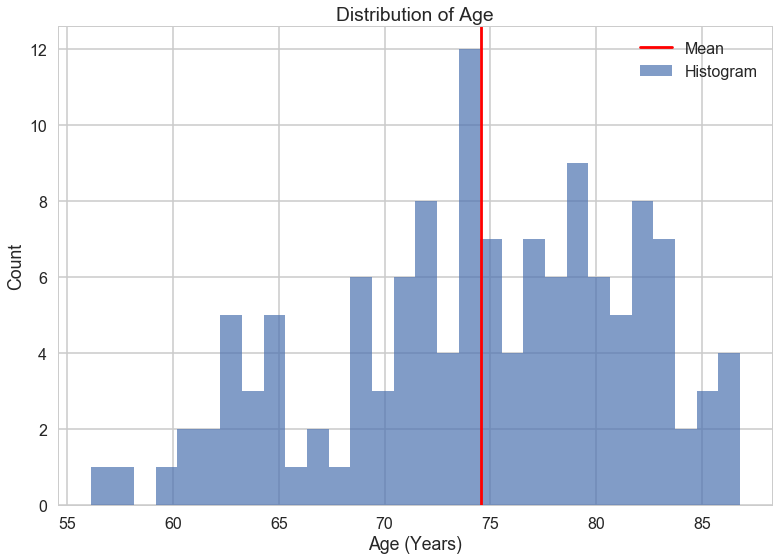

In [4]:
# Univariate age distribution
plt.hist(data_train['AGE'], alpha=0.7, bins=30, label='Histogram')
plt.title('Distribution of Age')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.axvline(data_train.AGE.mean(), 0, 1.0, color='red', label='Mean')
plt.legend();

#### Regression plot with confidence interval and count plot

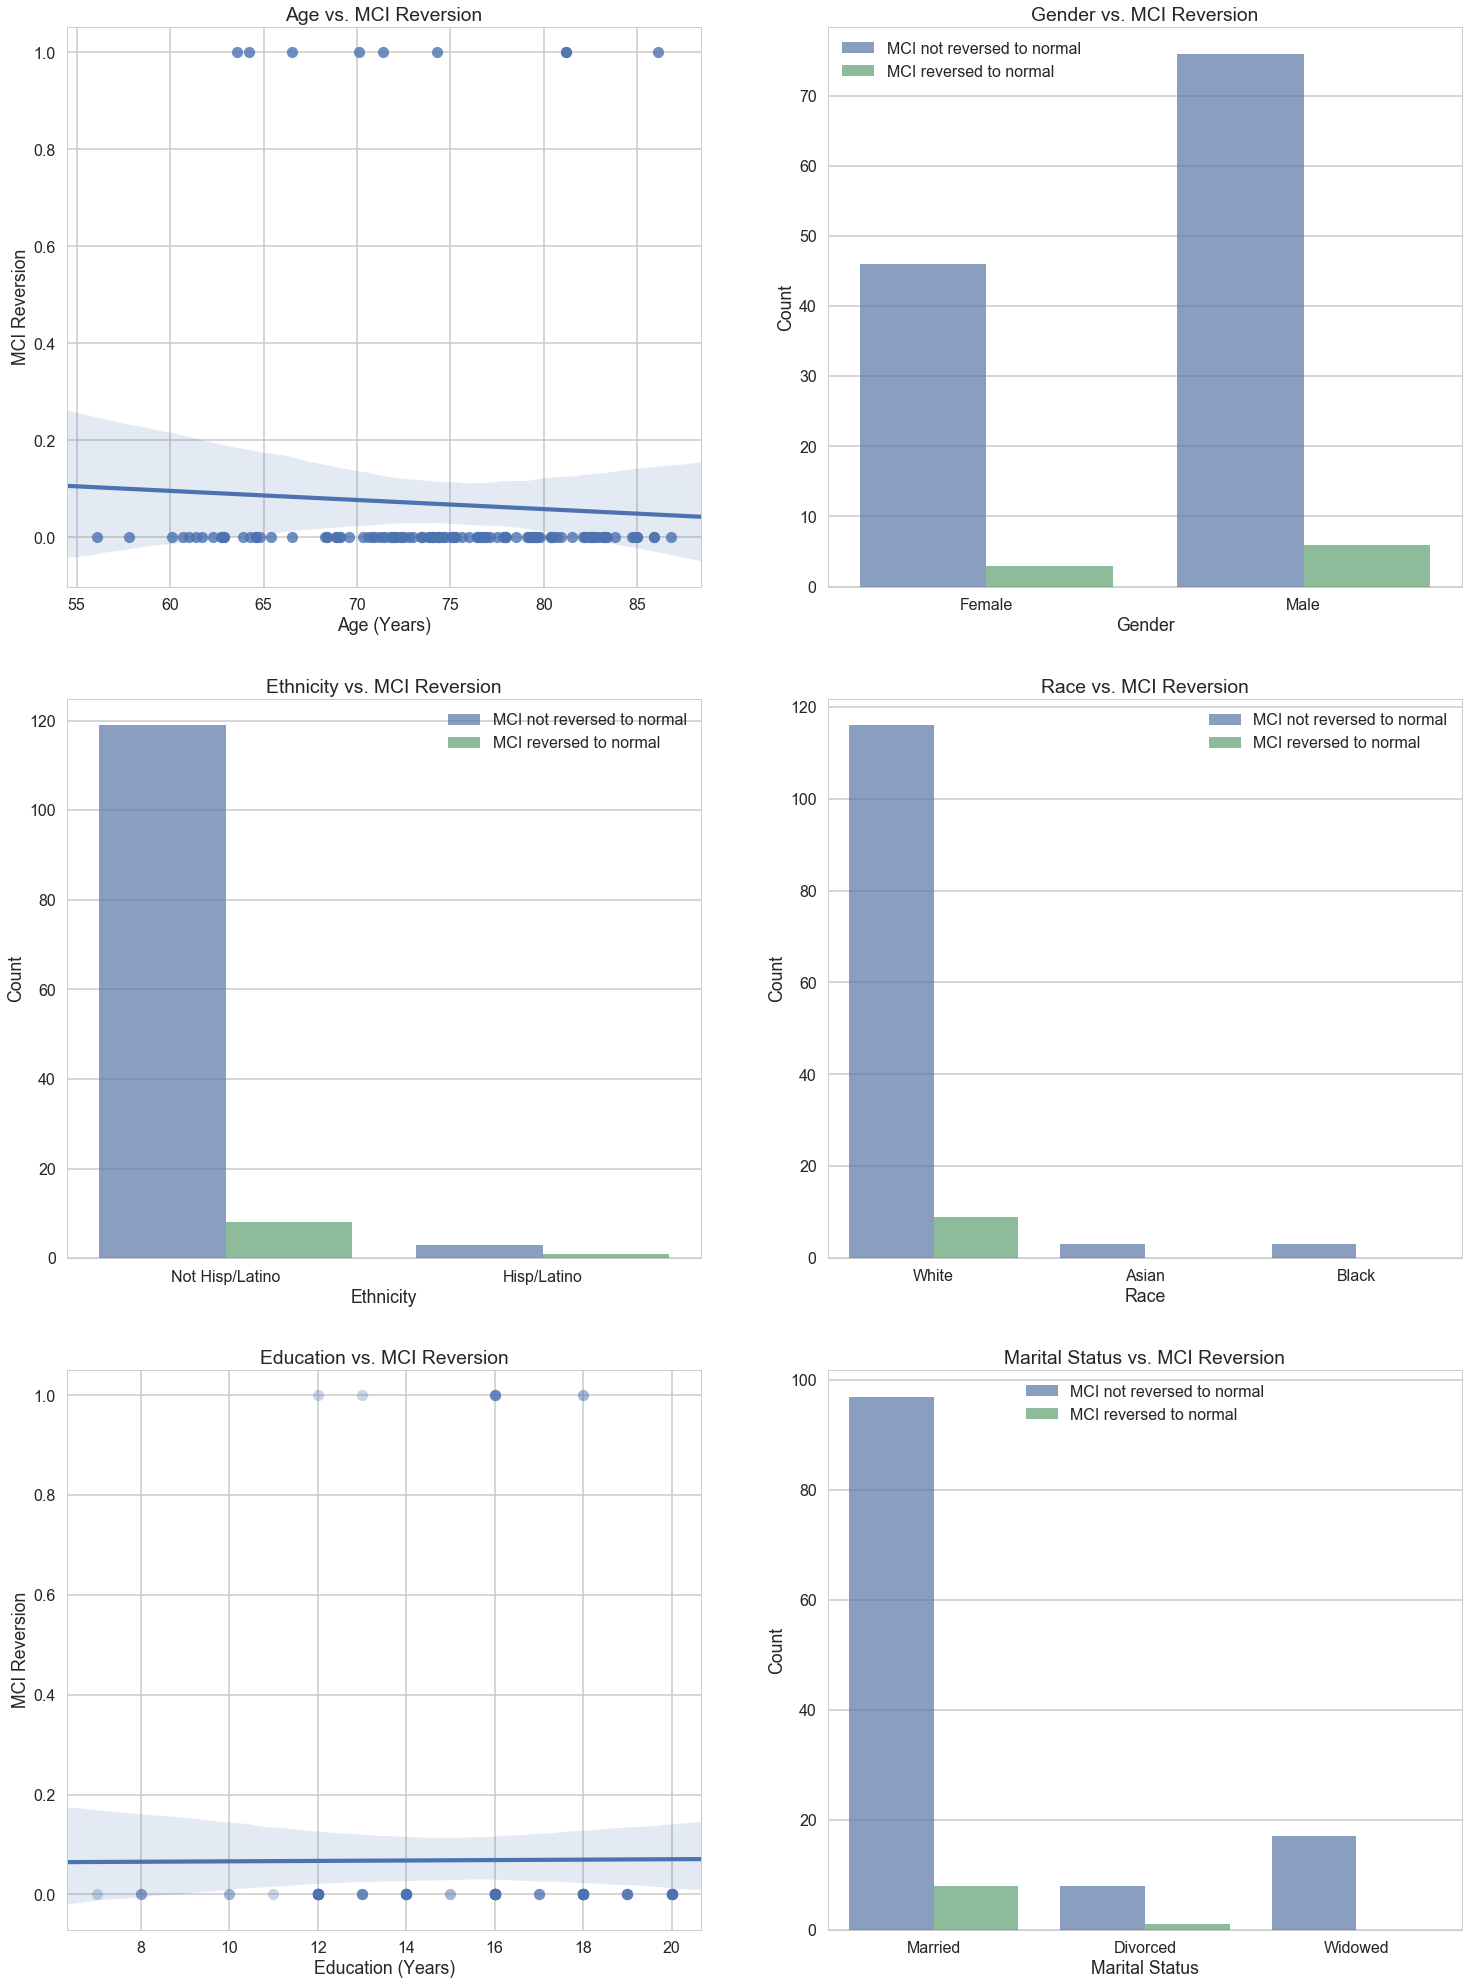

In [5]:
plt.figure(figsize=(25,35))

# Age vs. MCI Reversion
plt.subplot(3,2,1)
data_age = data_train[['AGE','MCI_reversion_2y']]
sns.regplot(x='AGE', y='MCI_reversion_2y', data=data_age)
plt.title('Age vs. MCI Reversion')
plt.xlabel('Age (Years)')
plt.ylabel('MCI Reversion')

# Gender vs. MCI Reversion
plt.subplot(3,2,2)
data_gender = data_train[['PTGENDER','MCI_reversion_2y']]
sns.countplot(x='PTGENDER', hue='MCI_reversion_2y', data=data_gender,alpha=0.7)
plt.title('Gender vs. MCI Reversion')
plt.xlabel('Gender')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'])
    
# Ethnicity vs. MCI Reversion
plt.subplot(3,2,3)
data_eth = data_train[['PTETHCAT','MCI_reversion_2y']]
sns.countplot(x='PTETHCAT', hue='MCI_reversion_2y', data=data_eth,alpha=0.7)
plt.title('Ethnicity vs. MCI Reversion')
plt.xlabel('Ethnicity')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'])

# Race vs. MCI Reversion
plt.subplot(3,2,4)
data_race = data_train[['PTRACCAT','MCI_reversion_2y']]
sns.countplot(x='PTRACCAT', hue='MCI_reversion_2y', data=data_race,alpha=0.7)
plt.title('Race vs. MCI Reversion')
plt.xlabel('Race')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'], loc='upper right')
    
# Education
plt.subplot(3,2,5)
data_edu = data_train[['PTEDUCAT','MCI_reversion_2y']]
sns.regplot(x='PTEDUCAT', y='MCI_reversion_2y', data=data_edu, scatter_kws={'alpha':0.3})
plt.title('Education vs. MCI Reversion')
plt.xlabel('Education (Years)')
plt.ylabel('MCI Reversion')

# Marital Status vs. MCI Reversion
plt.subplot(3,2,6)
data_mar = data_train[['PTMARRY','MCI_reversion_2y']]
sns.countplot(x='PTMARRY', hue="MCI_reversion_2y", data=data_mar,alpha=0.7)
plt.title('Marital Status vs. MCI Reversion')
plt.xlabel('Marital Status')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal']);

##### Interpretation
- **Age:** Age distribution among training set is slightly skewed to the right, with mean = 74. As age increases, the probability of MCI reversing to normal decreases. We select age as our potential predictor.
- **Gender:** ~60% subjects in the training set is male and ~40% is female. The number of cases in training set is small, but it appears that the probability of MCI reversing to normal is higher among males as compared to females.
- **Ethnicity:** The majority of people in our training set is 'Non-Hispanic/Latino'. We select gender as our potential predictor.
- **Race:** Again, the majority people in our training set is 'White'. We do not have sufficient power to observe the pattern of MCI reversion across different race groups.
- **Education:** There is no apparent trend between education and our response variable (MCI reversion). 
- **Marital Status:** Given the information above, widowed people has the lowest chance of MCI reversing to normal, followed by married people. We select Martial Status as our potential predictor.

### b. Clinical Factors

#### Regression plot with confidence interval and count plot

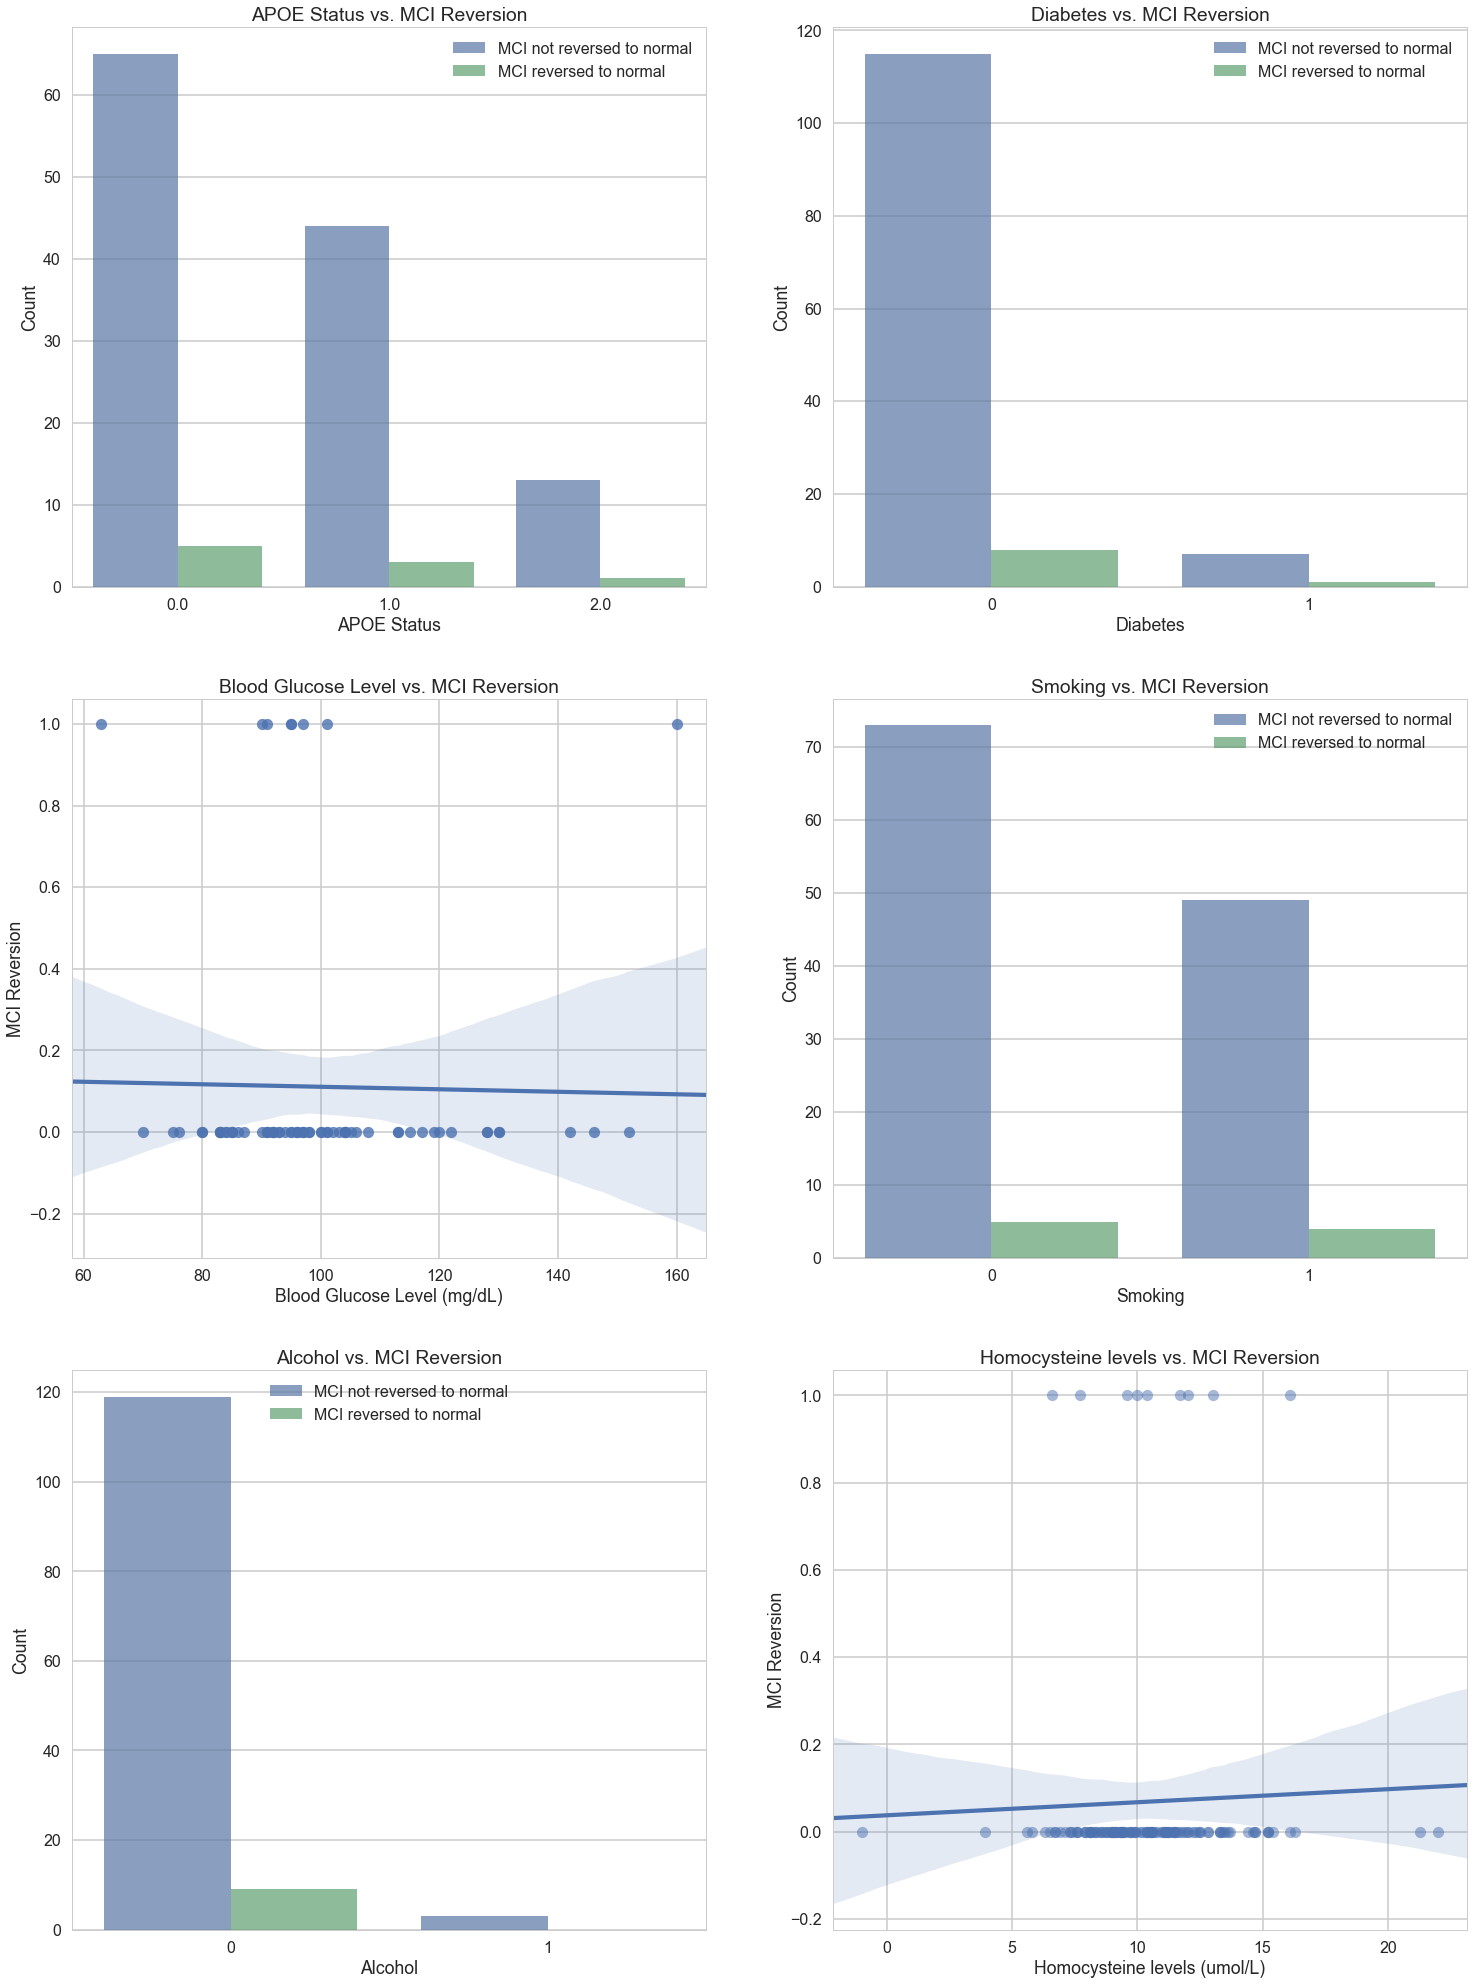

In [6]:
plt.figure(figsize=(25,35))

# APOE status vs. MCI Reversion
plt.subplot(3,2,1)
data_apoe = data_train[['APOE4','MCI_reversion_2y']]
sns.countplot(x='APOE4', hue='MCI_reversion_2y', data=data_apoe,alpha=0.7)
plt.title('APOE Status vs. MCI Reversion')
plt.xlabel('APOE Status')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'])
    
# Diabetes vs. MCI Reversion
plt.subplot(3,2,2)
data_dia = data_train[['diabetes','MCI_reversion_2y']]
sns.countplot(x="diabetes", hue="MCI_reversion_2y", data=data_dia,alpha=0.7)
plt.title('Diabetes vs. MCI Reversion')
plt.xlabel('Diabetes')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'])
    
# Continuous blood glucose level vs. MCI reversion
plt.subplot(3,2,3)
data_glu = data_train[['PMBLGLUC','MCI_reversion_2y']]
sns.regplot(x='PMBLGLUC', y="MCI_reversion_2y", data=data_glu)
plt.title('Blood Glucose Level vs. MCI Reversion')
plt.xlabel('Blood Glucose Level (mg/dL)')
plt.ylabel('MCI Reversion')
    
# Smoking vs. MCI reversion
plt.subplot(3,2,4)
data_smo = data_train[['MH16SMOK','MCI_reversion_2y']]
sns.countplot(x='MH16SMOK', hue="MCI_reversion_2y",data=data_smo,alpha=0.7)
plt.title('Smoking vs. MCI Reversion')
plt.xlabel('Smoking')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'])
    
# Alcohol abuse vs. MCI reversion
plt.subplot(3,2,5)
data_alc = data_train[['MH14ALCH','MCI_reversion_2y']]
sns.countplot(x='MH14ALCH', hue="MCI_reversion_2y",data=data_alc,alpha=0.7)
plt.title('Alcohol vs. MCI Reversion')
plt.xlabel('Alcohol')
plt.ylabel('Count') 
plt.legend(['MCI not reversed to normal','MCI reversed to normal'])

# Homocysteine levels vs. MCI reversion
plt.subplot(3,2,6)
data_hom = data_train[['HCAMPLAS','MCI_reversion_2y']]
sns.regplot(x='HCAMPLAS', y="MCI_reversion_2y", data=data_hom, scatter_kws={'alpha':0.5})
plt.title('Homocysteine levels vs. MCI Reversion')
plt.xlabel('Homocysteine levels (umol/L)')
plt.ylabel('MCI Reversion');

##### Interpretation
- **APOE4:** Increased copy of APOE4 allele is associated with decreased probability of MCI reversing to normal. We select APOE4 as our potential predictor.
- **Diabetes:** There is not many diabetes cases in our study.
- **Blood glucose level:** The association between blood glucose level and MCI reversion is not clear with wide confidence interval at both tails.
- **Smoking:** Smoking doesn't seem to be associated with the probability of MCI reversion. The majority people in our training set is not alcohol abused; therefore, we do not have enough power to evaluate the effect of alcohol abuse in our sample.
- **Homocysteine level:** Higher homosysteine levels is associated with higher probability of MCI reversion.

### c. Neuropsychological Measures

#### Histogram

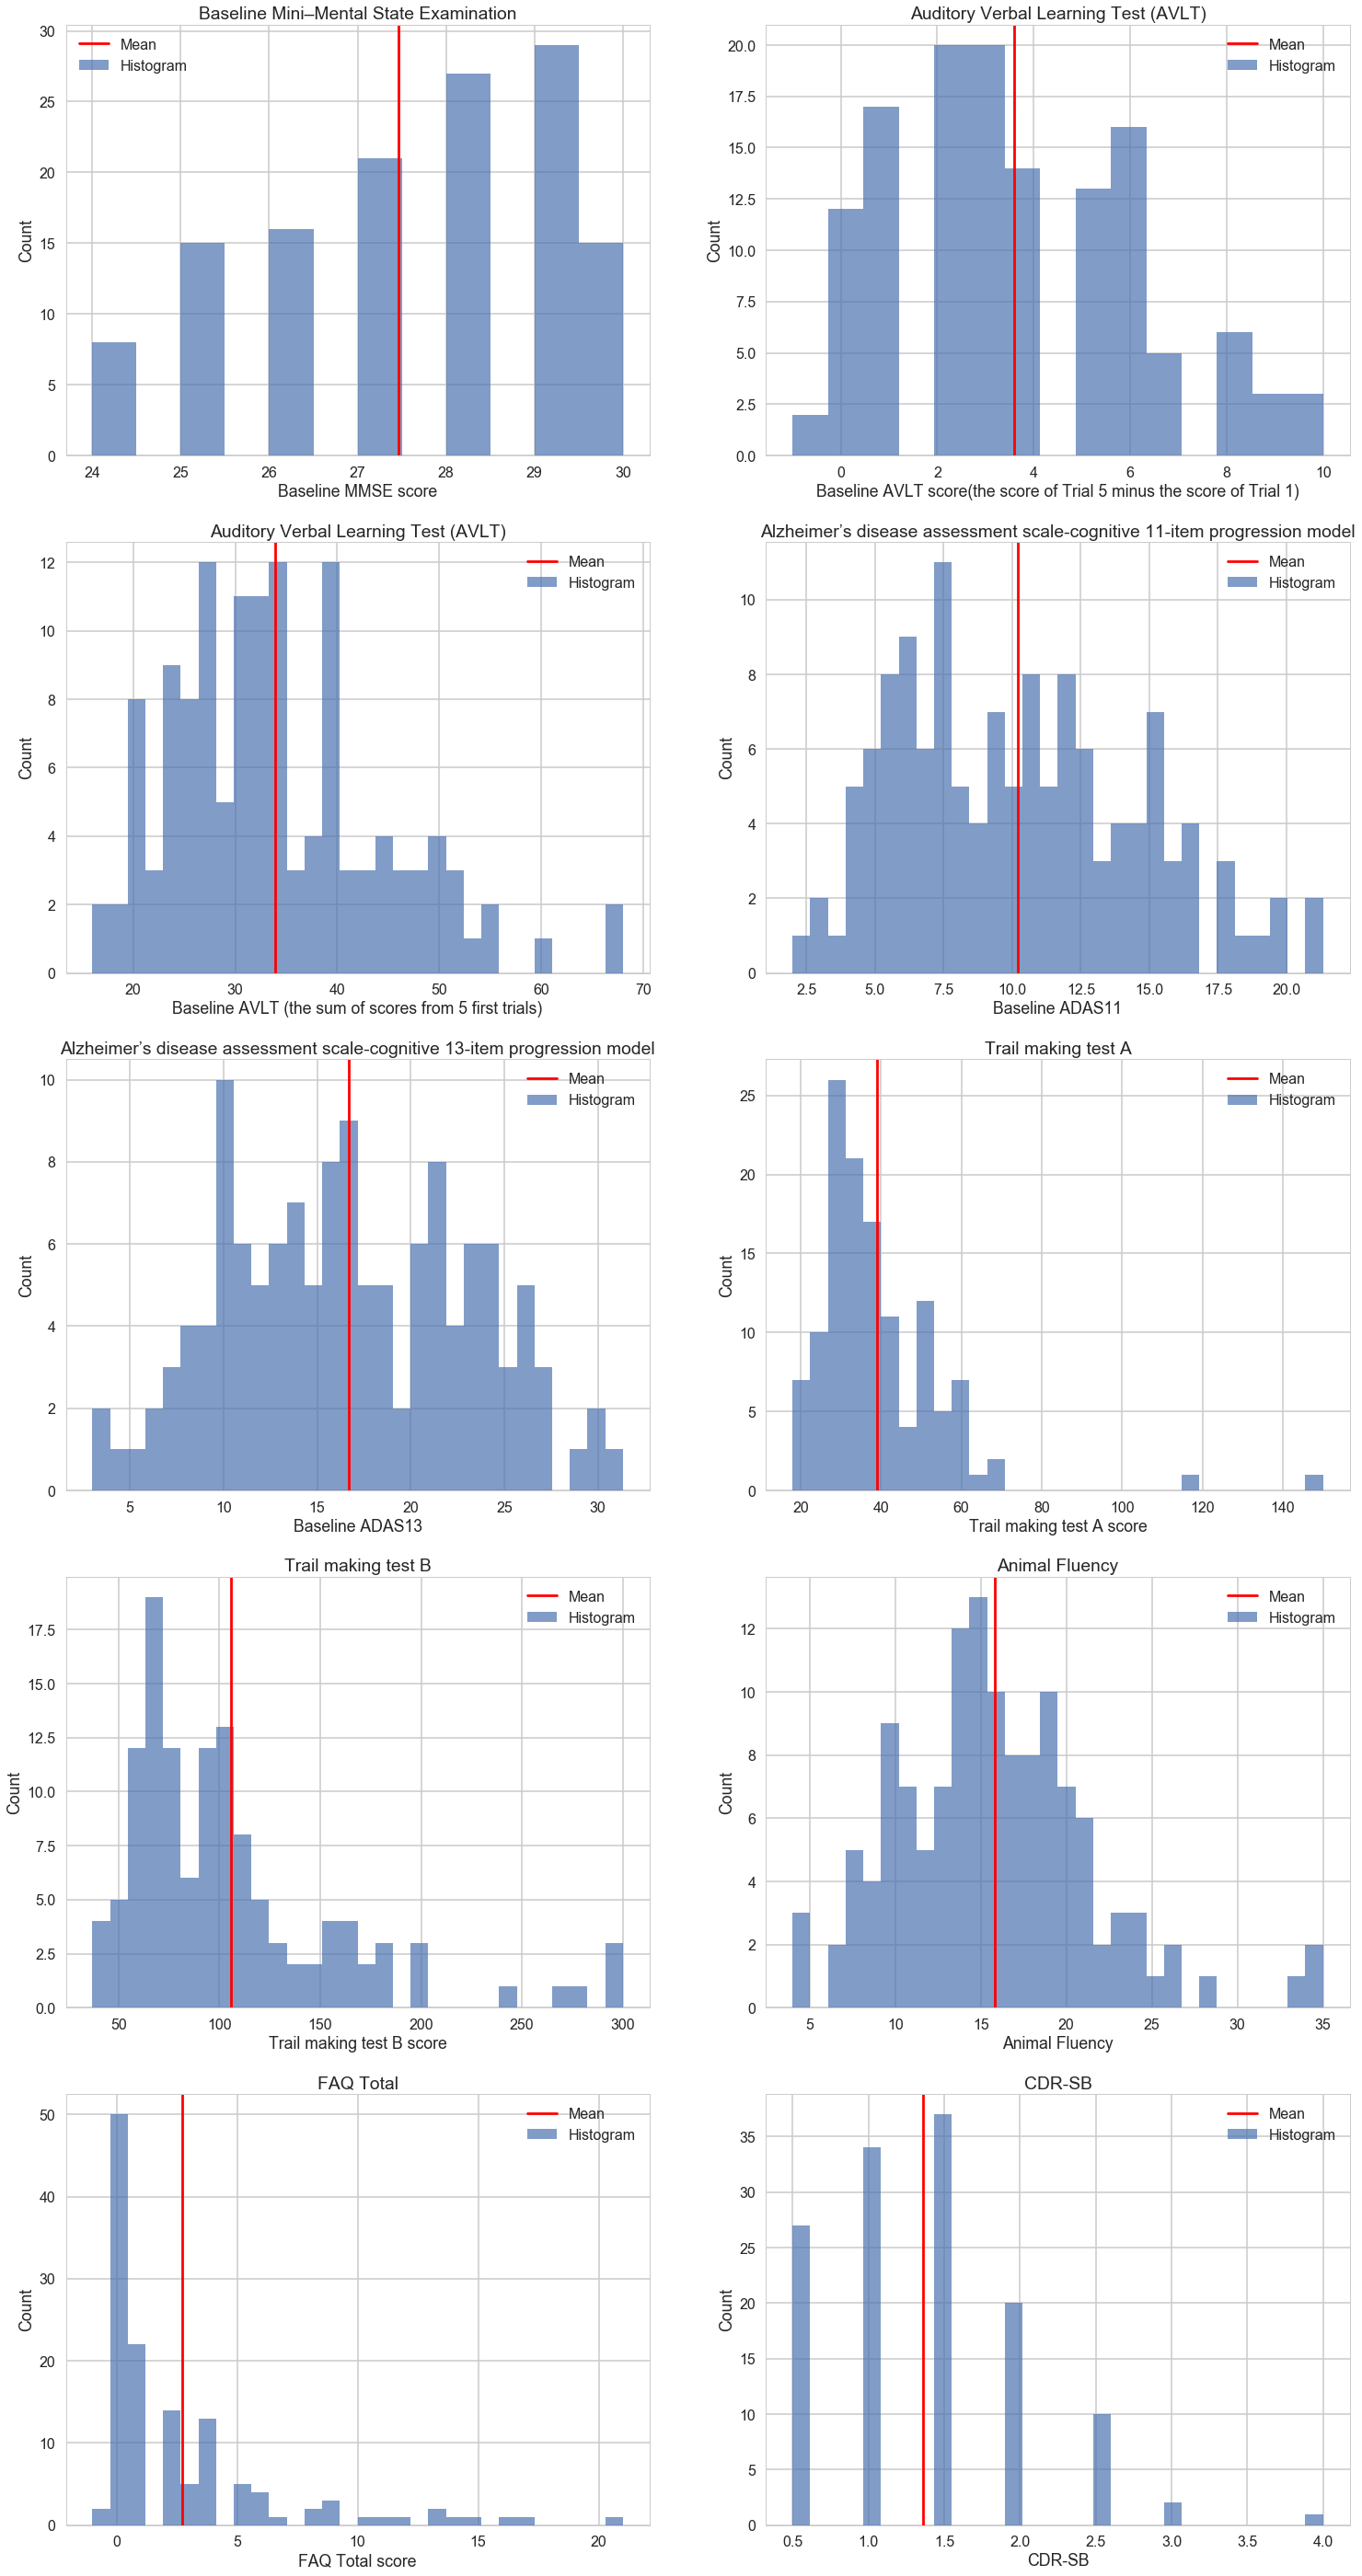

In [7]:
plt.figure(figsize=(25,50))

# MMSE
plt.subplot(5,2,1)
plt.hist(x="MMSE_bl", data=data_train,alpha=0.7,bins=12,label='Histogram');
plt.title('Baseline Mini–Mental State Examination')
plt.xlabel('Baseline MMSE score')
plt.ylabel('Count')
plt.axvline(data_train['MMSE_bl'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# RAVLT_learning_bl
plt.subplot(5,2,2)
plt.hist(x="RAVLT_learning_bl", data=data_train,alpha=0.7,bins=15,label='Histogram');
plt.title('Auditory Verbal Learning Test (AVLT)')
plt.xlabel('Baseline AVLT score(the score of Trial 5 minus the score of Trial 1)')
plt.ylabel('Count')
plt.axvline(data_train['RAVLT_learning_bl'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# RAVLT_immediate_bl
plt.subplot(5,2,3)
plt.hist(x="RAVLT_immediate_bl", data=data_train,alpha=0.7,bins=30,label='Histogram');
plt.title('Auditory Verbal Learning Test (AVLT)')
plt.xlabel('Baseline AVLT (the sum of scores from 5 first trials)')
plt.ylabel('Count')
plt.axvline(data_train['RAVLT_immediate_bl'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# ADAS11_bl
plt.subplot(5,2,4)
plt.hist(x="ADAS11_bl", data=data_train,alpha=0.7,bins=30,label='Histogram');
plt.title('Alzheimer’s disease assessment scale-cognitive 11-item progression model')
plt.xlabel('Baseline ADAS11')
plt.ylabel('Count')
plt.axvline(data_train['ADAS11_bl'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# ADAS13_bl
plt.subplot(5,2,5)
plt.hist(x=data_train['ADAS13_bl'].dropna(),alpha=0.7,bins=30,label='Histogram');
plt.title('Alzheimer’s disease assessment scale-cognitive 13-item progression model')
plt.xlabel('Baseline ADAS13')
plt.ylabel('Count')
plt.axvline(data_train['ADAS13_bl'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# TMT_PtA_Complete
plt.subplot(5,2,6)
plt.hist(x=data_train['TMT_PtA_Complete'].dropna(),alpha=0.7,bins=30,label='Histogram');
plt.title('Trail making test A')
plt.xlabel('Trail making test A score')
plt.ylabel('Count')
plt.axvline(data_train['TMT_PtA_Complete'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# TMT_PtB_Complete
plt.subplot(5,2,7)
plt.hist(x=data_train['TMT_PtB_Complete'].dropna(),alpha=0.7,bins=30,label='Histogram');
plt.title('Trail making test B')
plt.xlabel('Trail making test B score')
plt.ylabel('Count')
plt.axvline(data_train['TMT_PtB_Complete'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# Animal Fluency
plt.subplot(5,2,8)
plt.hist(x=data_train['CATANIMSC'].dropna(),alpha=0.7,bins=30,label='Histogram');
plt.title('Animal Fluency')
plt.xlabel('Animal Fluency')
plt.ylabel('Count')
plt.axvline(data_train['CATANIMSC'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()

# FAQTOTAL
plt.subplot(5,2,9)
plt.hist(x=data_train['FAQTOTAL'].dropna(),alpha=0.7,bins=30,label='Histogram');
plt.title('FAQ Total')
plt.xlabel('FAQ Total score')
plt.ylabel('Count')
plt.axvline(data_train['FAQTOTAL'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend()
    
# CDRSB_bl
plt.subplot(5,2,10)
plt.hist(x=data_train['CDRSB_bl'].dropna(),alpha=0.7,bins=30,label='Histogram');
plt.title('CDR-SB')
plt.xlabel('CDR-SB')
plt.ylabel('Count')
plt.axvline(data_train['CDRSB_bl'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend();

##### Interpretation
With the exception of Animal Fluency, all other neuropsychological measures appear to have skewed distributions. We may need to normalize or transform these values in the final analyses.

#### Correlation matrix

In [8]:
# Correlations between neuropsychological measures
neuropsych_m = data_train[['MMSE_bl','RAVLT_learning_bl','RAVLT_immediate_bl','TMT_PtA_Complete', 'TMT_PtB_Complete', 
                           'ADAS11_bl','ADAS13_bl' , 'CATANIMSC','FAQTOTAL','CDRSB_bl']].dropna()

corr2 = pd.DataFrame(np.corrcoef(neuropsych_m.T))
corr2.columns = ['MMSE_bl','RAVLT_learning_bl','RAVLT_immediate_bl','TMT_PtA_Complete', 'TMT_PtB_Complete', 
                           'ADAS11_bl','ADAS13_bl', 'CATANIMSC','FAQTOTAL','CDRSB_bl']
corr2

,MMSE_bl,RAVLT_learning_bl,RAVLT_immediate_bl,TMT_PtA_Complete,TMT_PtB_Complete,ADAS11_bl,ADAS13_bl,CATANIMSC,FAQTOTAL,CDRSB_bl
0,1.000000,0.281842,0.255964,-0.020334,-0.130240,-0.375611,-0.360387,0.188049,0.021165,-0.213468
1,0.281842,1.000000,0.563072,-0.182830,-0.198638,-0.527766,-0.547605,0.332077,-0.121356,-0.170100
2,0.255964,0.563072,1.000000,-0.246167,-0.314411,-0.542842,-0.608694,0.462705,-0.106777,-0.085454
3,-0.020334,-0.182830,-0.246167,1.000000,0.692143,0.322168,0.309501,-0.374894,0.313424,0.288275
4,-0.130240,-0.198638,-0.314411,0.692143,1.000000,0.316102,0.362726,-0.446413,0.359027,0.237068
5,-0.375611,-0.527766,-0.542842,0.322168,0.316102,1.000000,0.949986,-0.496677,0.009193,0.122290
6,-0.360387,-0.547605,-0.608694,0.309501,0.362726,0.949986,1.000000,-0.518700,0.044160,0.163000
7,0.188049,0.332077,0.462705,-0.374894,-0.446413,-0.496677,-0.518700,1.000000,-0.128936,-0.032693
8,0.021165,-0.121356,-0.106777,0.313424,0.359027,0.009193,0.044160,-0.128936,1.000000,0.517267
9,-0.213468,-0.170100,-0.085454,0.288275,0.237068,0.122290,0.163000,-0.032693,0.517267,1.000000


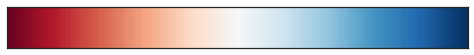

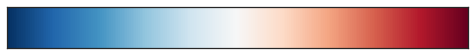

In [20]:
dpal = sns.choose_colorbrewer_palette(data_type='diverging', as_cmap=True)

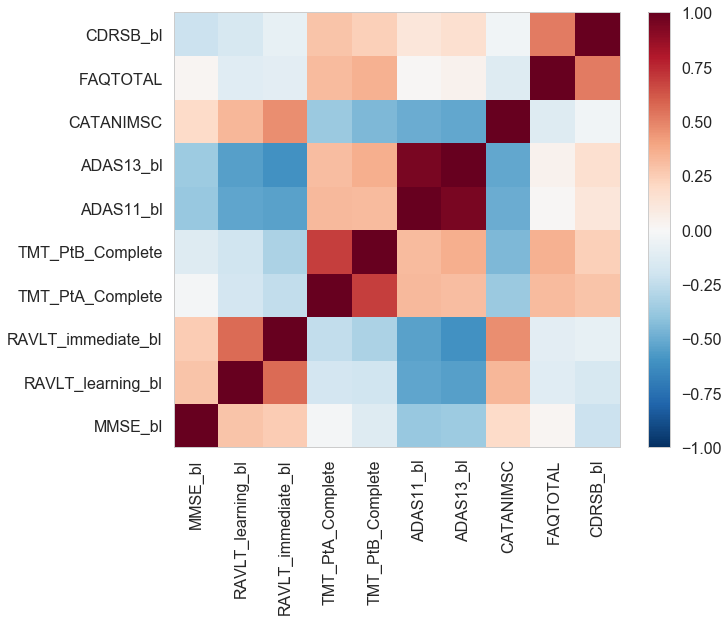

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
plt.pcolor(corr2, cmap=dpal, vmin=-1, vmax=1)
plt.xticks(np.arange(neuropsych_m.shape[1])+0.5, list(neuropsych_m), rotation='vertical')
plt.yticks(np.arange(neuropsych_m.shape[1])+0.5, list(neuropsych_m),rotation='horizontal')
plt.colorbar();

##### Interpretation
Neuropsychological measures in the same domain (e.g. Trail making Tests are in the attention/executive functioning domain; AVLT measures are in the memory domain), tend to be positively correlated. Correlations tend to be weaker and often in opposite directions for inter-domain comparisons.

#### Regression plot with confidence interval (Univariate)

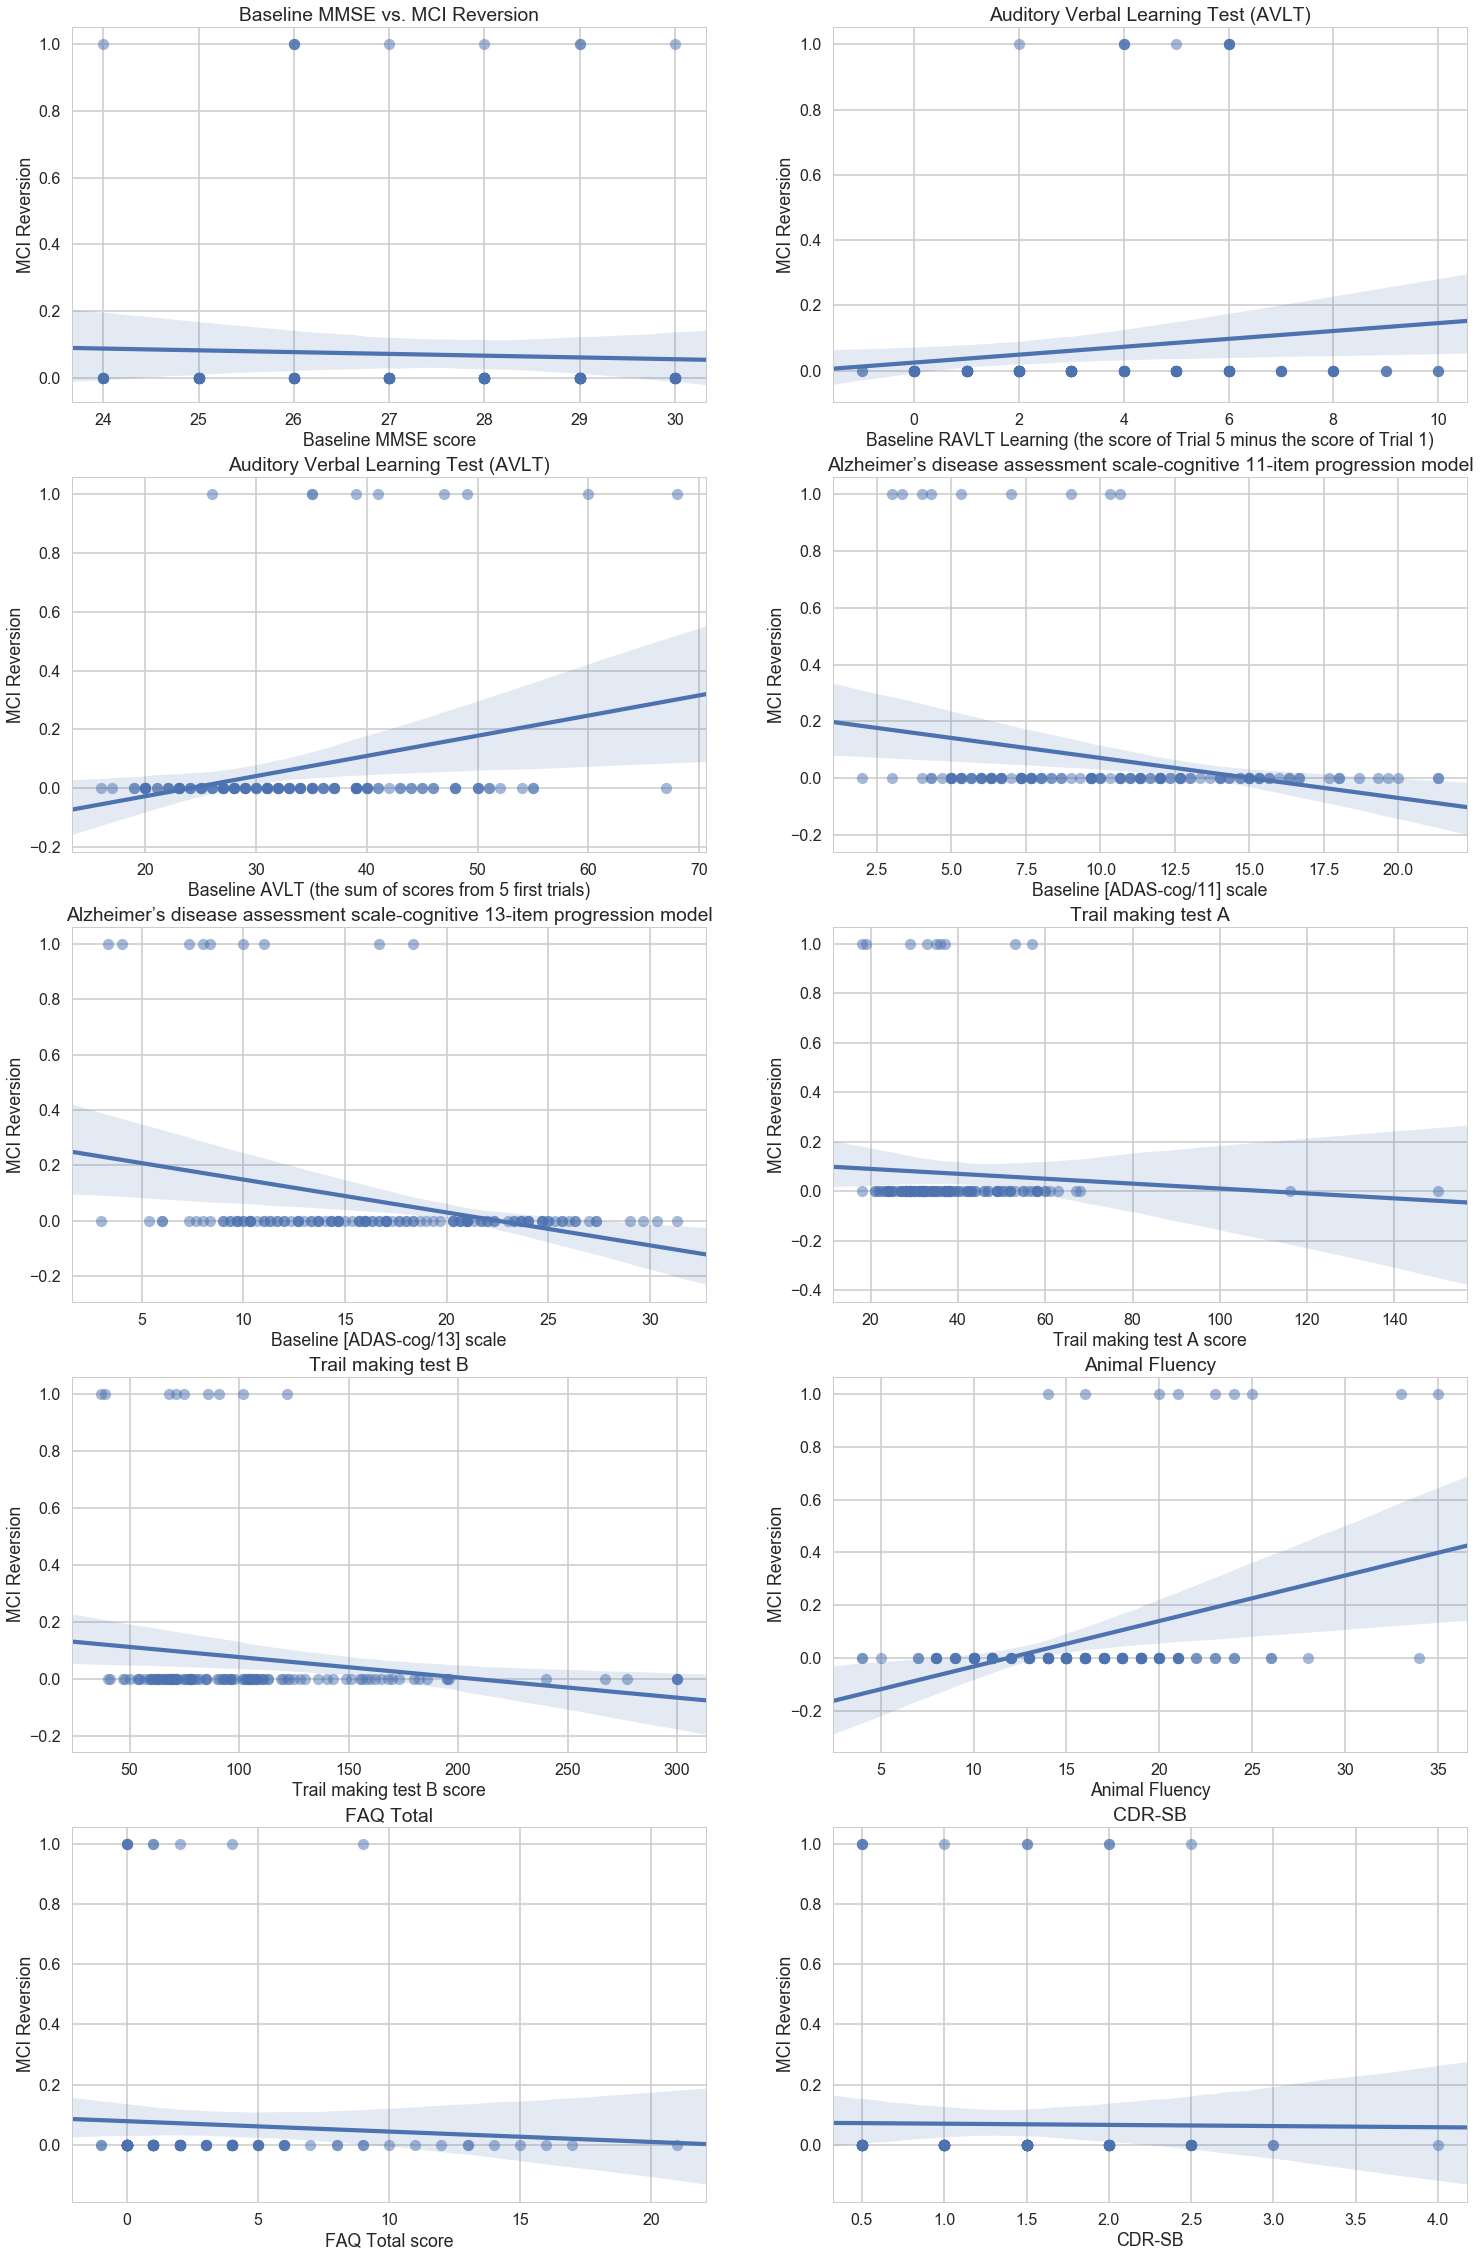

In [11]:
plt.figure(figsize=(25,40))

# MMSE
plt.subplot(5,2,1)
sns.regplot(x='MMSE_bl', y='MCI_reversion_2y', data=data_train, scatter_kws={'alpha':0.5})
plt.title('Baseline MMSE vs. MCI Reversion')
plt.xlabel('Baseline MMSE score')
plt.ylabel('MCI Reversion')
    
# RAVLT_learning_bl
plt.subplot(5,2,2)
sns.regplot(x='RAVLT_learning_bl', y='MCI_reversion_2y', data=data_train, scatter_kws={'alpha':0.5})
plt.title('Auditory Verbal Learning Test (AVLT)')
plt.xlabel('Baseline RAVLT Learning (the score of Trial 5 minus the score of Trial 1)')
plt.ylabel('MCI Reversion')
    
# RAVLT_immediate_bl
plt.subplot(5,2,3)
sns.regplot(x='RAVLT_immediate_bl', y='MCI_reversion_2y', data=data_train, scatter_kws={'alpha':0.5})
plt.title('Auditory Verbal Learning Test (AVLT)')
plt.xlabel('Baseline AVLT (the sum of scores from 5 first trials)')
plt.ylabel('MCI Reversion')
    
# ADAS11_bl
plt.subplot(5,2,4)
sns.regplot(x='ADAS11_bl', y='MCI_reversion_2y', data=data_train, scatter_kws={'alpha':0.5})
plt.title('Alzheimer’s disease assessment scale-cognitive 11-item progression model')
plt.xlabel('Baseline [ADAS-cog/11] scale')
plt.ylabel('MCI Reversion')
    
# ADAS13_bl
plt.subplot(5,2,5)
sns.regplot(x='ADAS13_bl', y='MCI_reversion_2y', data=data_train, scatter_kws={'alpha':0.5})
plt.title('Alzheimer’s disease assessment scale-cognitive 13-item progression model')
plt.xlabel('Baseline [ADAS-cog/13] scale')
plt.ylabel('MCI Reversion')
    
# TMT_PtA_Complete
plt.subplot(5,2,6)
sns.regplot(x='TMT_PtA_Complete', y='MCI_reversion_2y', data=data_train, scatter_kws={'alpha':0.5})
plt.title('Trail making test A')
plt.xlabel('Trail making test A score')
plt.ylabel('MCI Reversion')
    
# TMT_PtB_Complete
plt.subplot(5,2,7)
sns.regplot(x="TMT_PtB_Complete", y="MCI_reversion_2y", data=data_train, scatter_kws={'alpha':0.5})
plt.title('Trail making test B')
plt.xlabel('Trail making test B score')
plt.ylabel('MCI Reversion')
    
# Animal Fluency
plt.subplot(5,2,8)
sns.regplot(x='CATANIMSC', y='MCI_reversion_2y', data=data_train, scatter_kws={'alpha':0.5})
plt.title('Animal Fluency')
plt.xlabel('Animal Fluency')
plt.ylabel('MCI Reversion')
    
# FAQTOTAL
plt.subplot(5,2,9)
sns.regplot(x='FAQTOTAL', y='MCI_reversion_2y', data=data_train, scatter_kws={'alpha':0.5})
plt.title('FAQ Total')
plt.xlabel('FAQ Total score')
plt.ylabel('MCI Reversion')
    
# CDRSB_bl
plt.subplot(5,2,10)
sns.regplot(x='CDRSB_bl', y='MCI_reversion_2y', data=data_train, scatter_kws={'alpha':0.5})
plt.title('CDR-SB')
plt.xlabel('CDR-SB')
plt.ylabel('MCI Reversion');

##### Interpretation
There is no apparent trend between baseline MMSE score and our response variable (MCI reversion). Higher scores for the trail making tests (TNT A and B), indicate poorer attention/executive function; lower scores for Animal Fluency represent poorer language skills; lower scores for AVLT suggests poorer memory abilities; higher FAQ represent poorer functioning; higher CDR-SB scores indicates poorer cogntive/functional performance. Individuals with MCI reversion at the 2 year point overall had lower scores for the TNT, higher scores for AVLT, higher scores for Animal fluency, lower FAQ scores, and lower CDR-SB scores, which suggests that the MCI-reverters tended to have better overall cognitive functioning at baseline compared to those with stable MCI. Also higher baseline Baseline [ADAS-cog/11] or [ADAS-cog/13] scale is significantly associated with lower probability of MCI reversion.

### d. Neuroimaging

#### Histogram

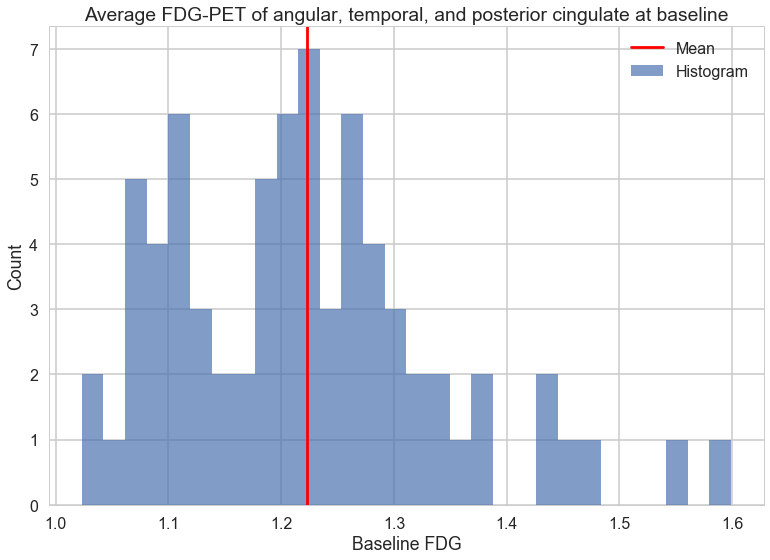

In [12]:
plt.hist(x=data_train['FDG_bl'].dropna(),alpha=0.7,bins=30,label='Histogram');
plt.title('Average FDG-PET of angular, temporal, and posterior cingulate at baseline')
plt.xlabel('Baseline FDG')
plt.ylabel('Count')
plt.axvline(data_train['FDG_bl'].mean(), 0, 1.0, color='red', label='Mean')
plt.legend();

#### Regression plot with confidence interval 

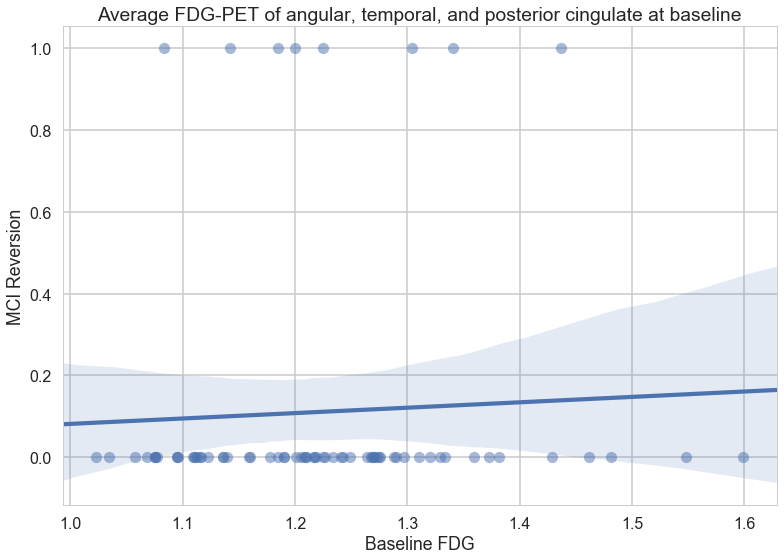

In [13]:
sns.regplot(x="FDG_bl", y="MCI_reversion_2y", data=data_train, scatter_kws={'alpha':0.5})
plt.title('Average FDG-PET of angular, temporal, and posterior cingulate at baseline')
plt.xlabel('Baseline FDG')
plt.ylabel('MCI Reversion');

##### Interpretation
The distribution of FDG-PET is slightly skewed to the left. There is no apparent trend between education and our response variable (MCI reversion).

### 5. Biomarkers

#### Histogram

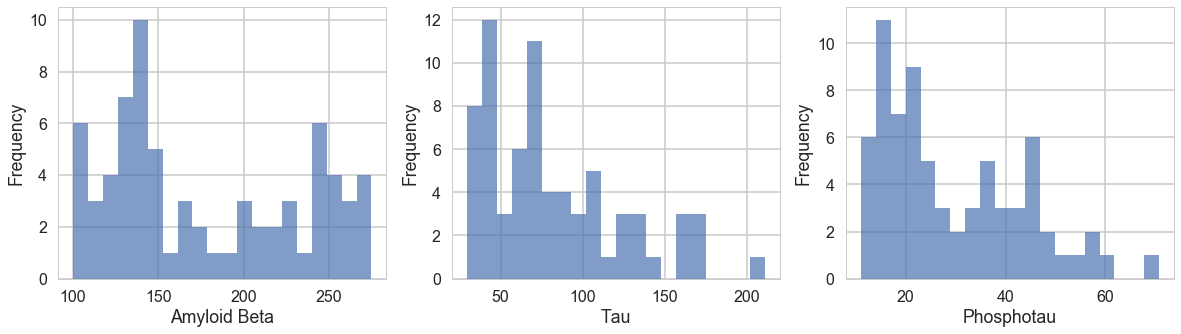

In [14]:
fig, ax = plt.subplots(1,3,figsize=(20,5))
ax[0].hist(x=data_train['ABETA'].dropna(),alpha=0.7,bins=20,label='Histogram')
ax[1].hist(x=data_train['TAU'].dropna(),alpha=0.7,bins=20,label='Histogram')
ax[2].hist(x=data_train['PTAU'].dropna(),alpha=0.7,bins=20,label='Histogram')
ax[0].set_xlabel("Amyloid Beta")
ax[1].set_xlabel("Tau")
ax[2].set_xlabel("Phosphotau")
ax[0].set_ylabel("Frequency")
ax[1].set_ylabel("Frequency")
ax[2].set_ylabel("Frequency");

#### Correlation matrix

In [15]:
# Correlations between biomarkers
biomkr = data_train[['ABETA','TAU','PTAU']].dropna()
corr = pd.DataFrame(np.corrcoef(biomkr.T)) # on transposed training matrix
corr.columns = ['ABETA','TAU','PTAU']
corr

,ABETA,TAU,PTAU
0,1.000000,-0.480831,-0.611257
1,-0.480831,1.000000,0.881356
2,-0.611257,0.881356,1.000000


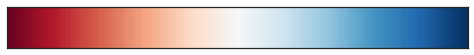

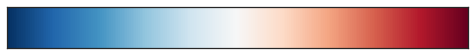

In [22]:
dpal = sns.choose_colorbrewer_palette(data_type='diverging', as_cmap=True)

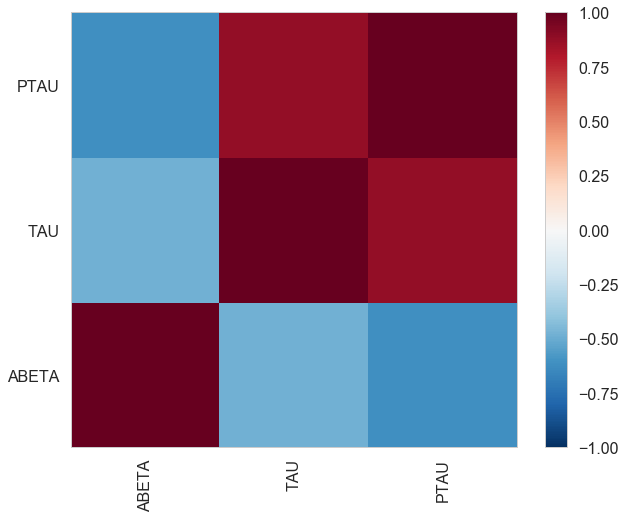

In [23]:
# Heatmap
fig, ax = plt.subplots(1,1, figsize=(10,8))
plt.pcolor(corr, cmap=dpal, vmin=-1, vmax=1)
plt.xticks(np.arange(biomkr.shape[1])+0.5, list(biomkr), rotation='vertical')
plt.yticks(np.arange(biomkr.shape[1])+0.5, list(biomkr),rotation='horizontal')
plt.colorbar();

##### Interpretation
There appears to be a bimodal distribution for amyloid beta, while the tau and phosph-tau levels are right skewed. There is high positive correlation between CSF concentrations tau and phosphoryated-tau, which is unsurprising given that high concentrations of both are indicative of synaptic dysfunction and/or early neurodegeneration. Amyloid-beta concentrations, on the other hand, is negatively correlated with the other two biomarkers, which is consistent with the literature, since low concentrations of amyloid-beta suggest presence of cerebral amyloid accumulation.

#### Box plot

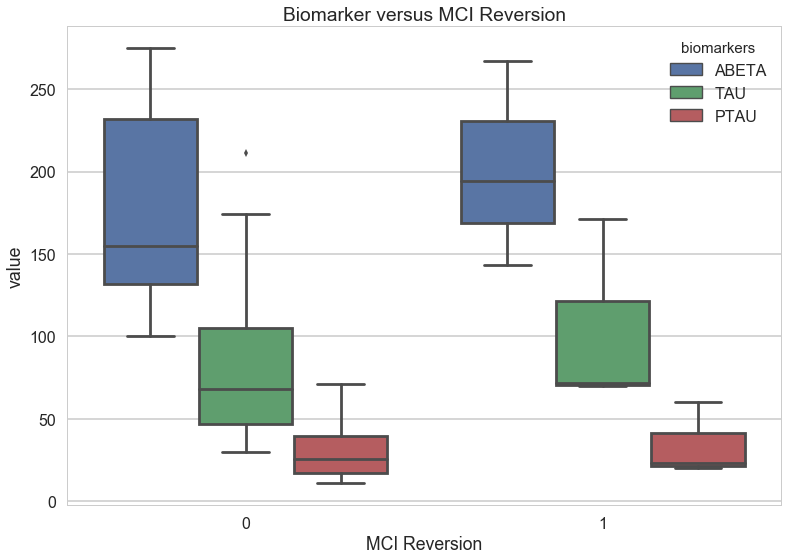

In [18]:
dd = pd.melt(data_train,id_vars=['MCI_reversion_2y'],value_vars=['ABETA','TAU','PTAU'],var_name='biomarkers')
sns.boxplot(x='MCI_reversion_2y',y='value',data=dd,hue='biomarkers')
plt.xlabel('MCI Reversion')
plt.title('Biomarker versus MCI Reversion');

##### Interpretation
Beta-amyloid levels at baseline appear to be lower than that among those who had stable MCI over the 2-year course, compared to those who had MCI reversion. On the other hand, tau and phospho-tau concentrations are higher at baseline among the MCI-reverters.